In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet
from statsmodels.tsa import arima_model
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
data = pd.read_csv('data/Total_consumption.csv')

In [3]:
data.head()

,Date,Consumption
0,2019-07-01,52592.11227
1,2019-06-01,56075.71803
2,2019-05-01,44210.21131
3,2019-04-01,40065.17496
4,2019-03-01,33449.05310


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.sort_values('Date', inplace=True)

In [6]:
data.reset_index(inplace=True, drop=True)

In [7]:
data['ConsumptionOrig'] = data['Consumption']

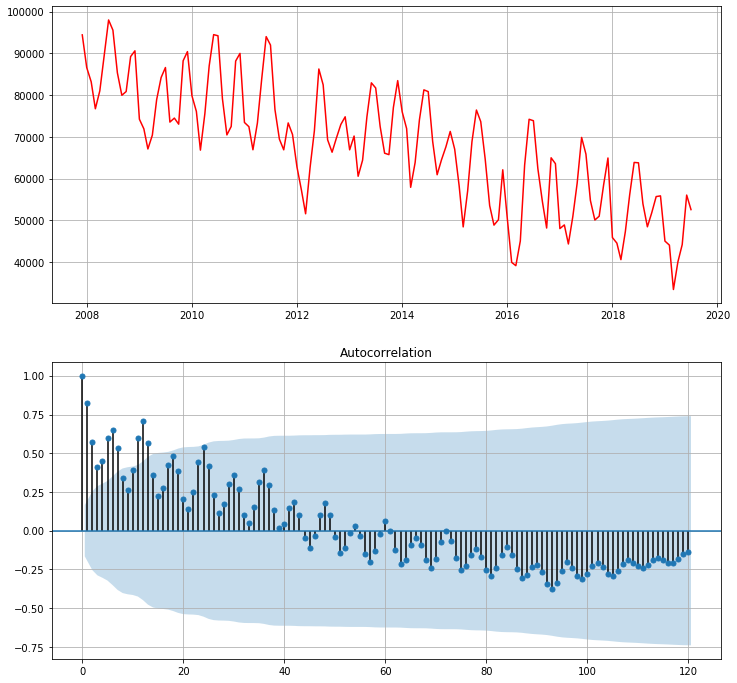

In [8]:
register_matplotlib_converters()
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(12);
fig.set_figheight(12);
axs[0].plot(data['Date'], data['Consumption'], c='r');
axs[0].grid(True);
plot_acf(data['Consumption'], ax=axs[1], lags=120);
plt.grid(True);

In [9]:
adfuller(data['Consumption'])[1]

0.8797409979909125

In [10]:
def box_koks(array, lamb=0):
    if lamb == 0:
        return np.log(array)
    else:
        return (array ** lamb - 1)/lamb

In [11]:
data['Consumption'] = box_koks(data['Consumption'])

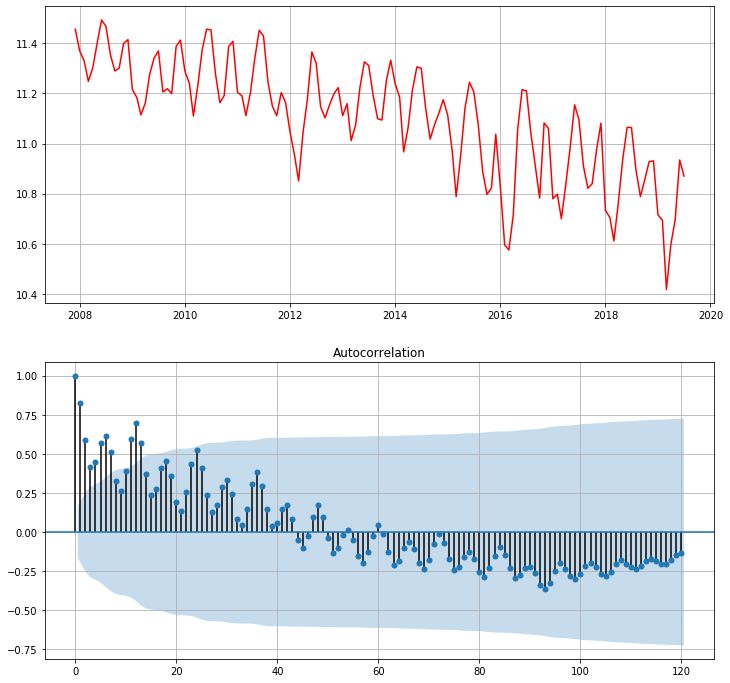

In [12]:
register_matplotlib_converters()
fig, axs = plt.subplots(2, 1)
fig.set_figwidth(12);
fig.set_figheight(12);
axs[0].plot(data['Date'], data['Consumption'], c='r');
axs[0].grid(True);
plot_acf(data['Consumption'], ax=axs[1], lags=120);
plt.grid(True);

In [13]:
adfuller(data['Consumption'])[1]

0.9353036085587688

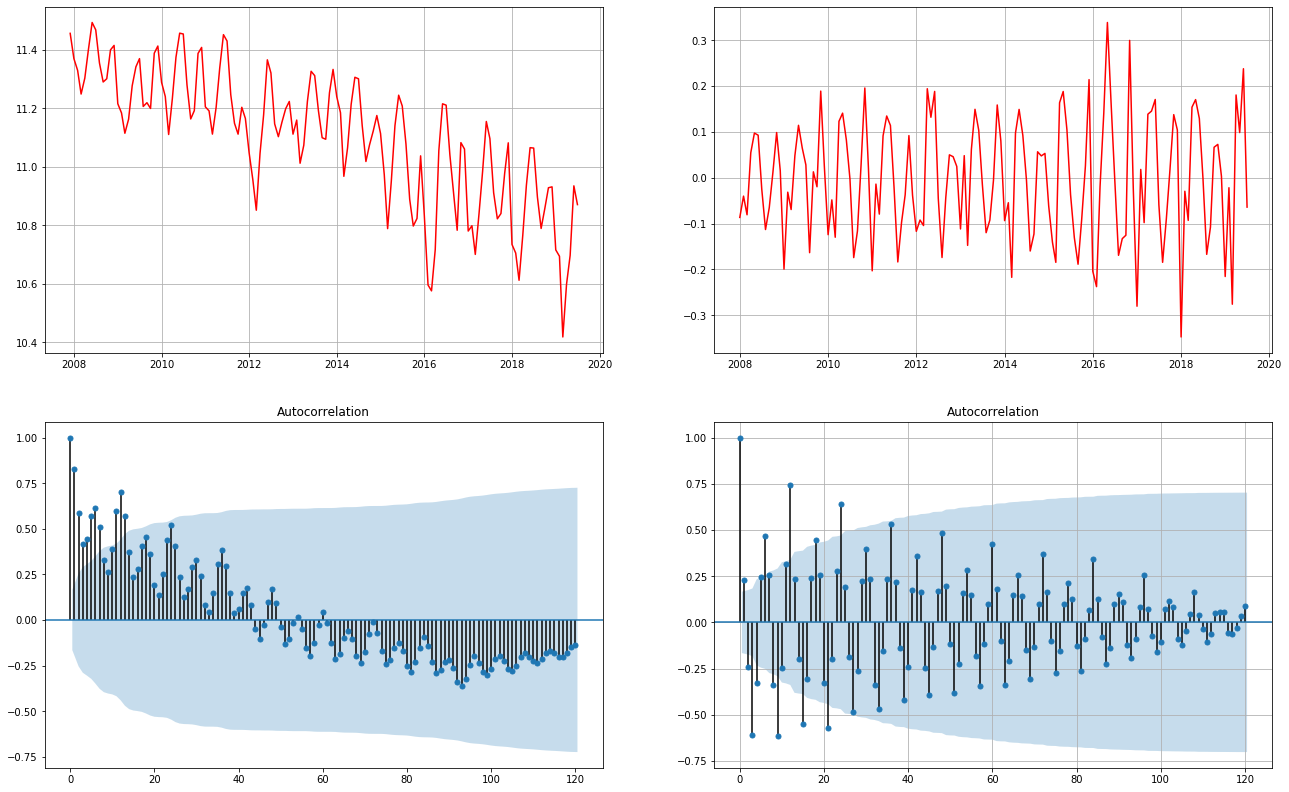

In [14]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[1:], (data['Consumption'] - data['Consumption'].shift(1)).iloc[1:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] - data['Consumption'].shift(1)).iloc[1:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [15]:
adfuller((data['Consumption'] - data['Consumption'].shift(1)).iloc[1:])[1]

0.0009024877399753751

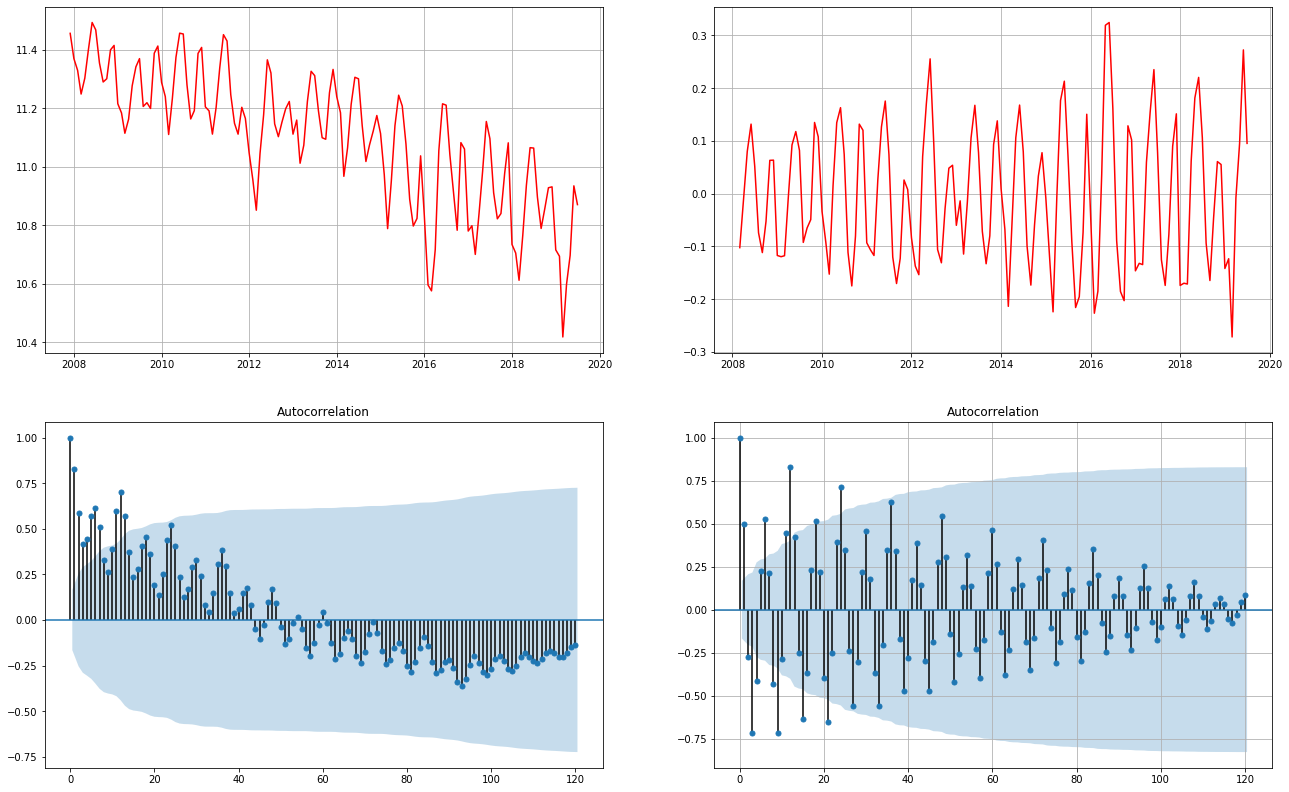

In [16]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[3:], (data['Consumption'] - data['Consumption'].rolling(4).mean()).iloc[3:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] - data['Consumption'].rolling(4).mean()).iloc[4:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [17]:
adfuller((data['Consumption'] - data['Consumption'].rolling(4).mean()).iloc[4:])[1]

0.012950365332193672

In [18]:
for i in range(1, 4):
    data[f'Consumption_{i}'] = data['Consumption'].shift(i)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression(fit_intercept=False)

In [21]:
model.fit(data[['Consumption_1', 'Consumption_2', 'Consumption_3']].iloc[3:], data['Consumption'].iloc[3:])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [22]:
model.coef_, model.intercept_

(array([ 1.30074733, -0.61892865,  0.31775096]), 0.0)

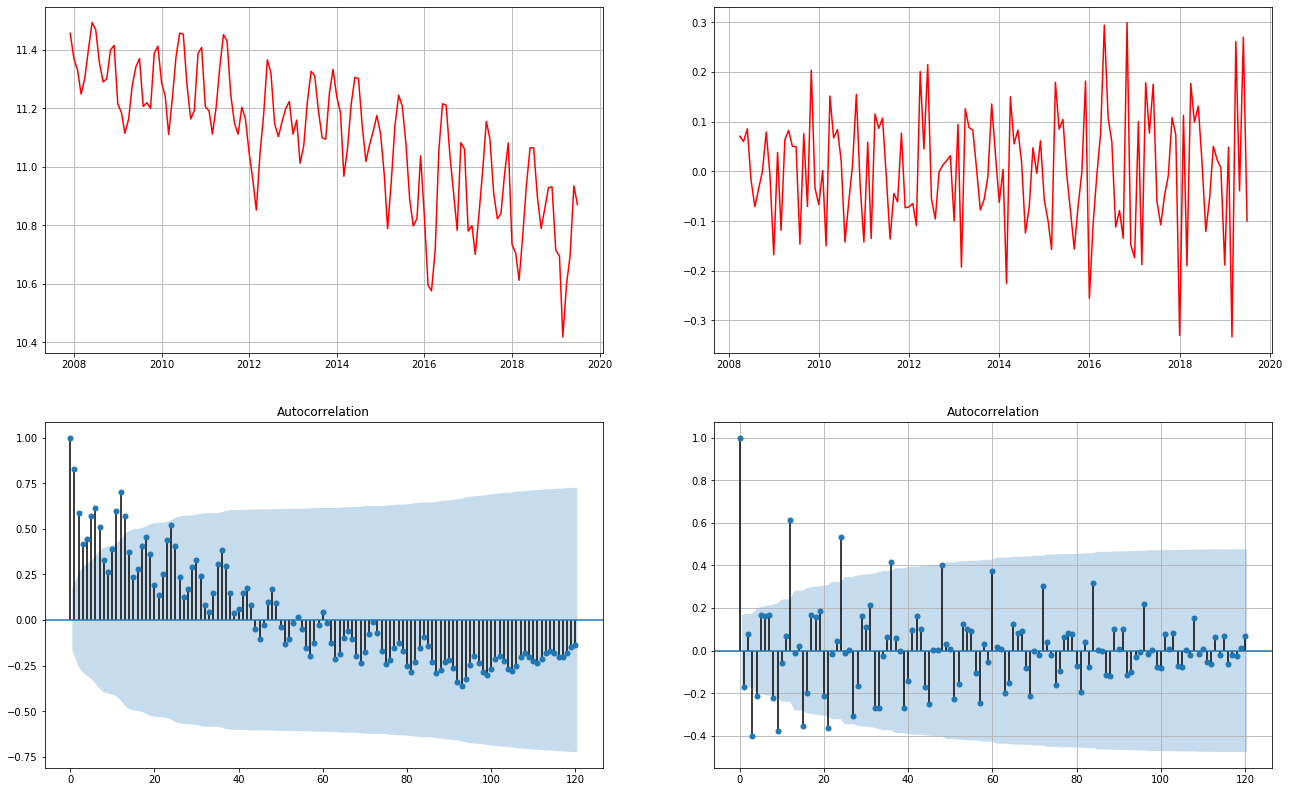

In [23]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[4:], 
               (data['Consumption'] 
                - model.coef_[0]*data['Consumption_1'] 
                - model.coef_[1]*data['Consumption_2']
                - model.coef_[2]*data['Consumption_3'] 
                - model.intercept_).iloc[4:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] 
          - model.coef_[0]*data['Consumption_1'] 
          - model.coef_[1]*data['Consumption_2']
          - model.coef_[2]*data['Consumption_3'] 
          - model.intercept_).iloc[4:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [24]:
adfuller((data['Consumption'] 
                - model.coef_[0]*data['Consumption_1'] 
                - model.coef_[1]*data['Consumption_2']
                - model.coef_[2]*data['Consumption_3'] 
                - model.intercept_).iloc[4:])[1]

0.03550057524801701

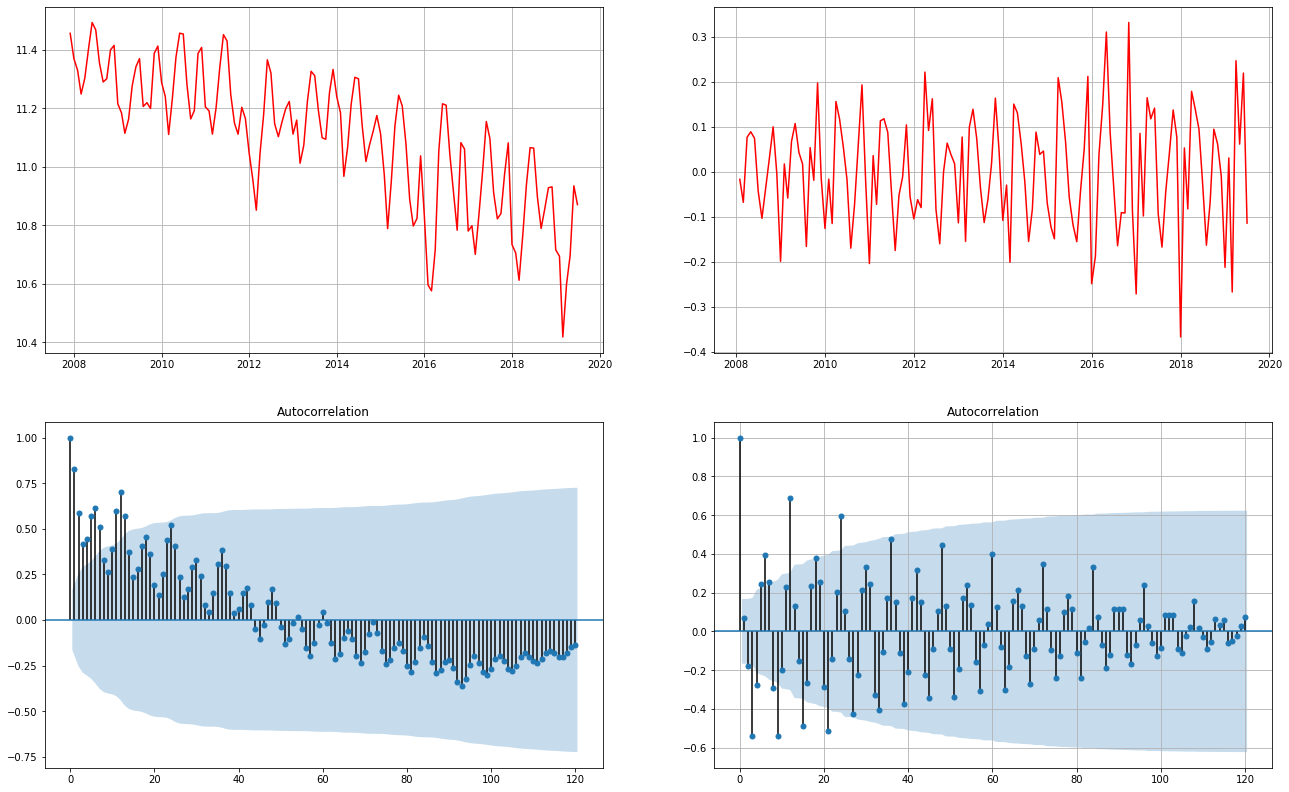

In [25]:
arma = arima_model.ARMA((data['Consumption'] - data['Consumption'].shift(1)).iloc[1:], (1, 0))
result = arma.fit()
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[2:], ((data['Consumption'] - data['Consumption'].shift(1)).iloc[1:] - result.predict()).iloc[1:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] - data['Consumption'].shift(1) - result.predict()).iloc[2:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [26]:
adfuller(((data['Consumption'] - data['Consumption'].shift(1)).iloc[1:] - result.predict()).iloc[1:])[1]

2.0278913826460616e-05

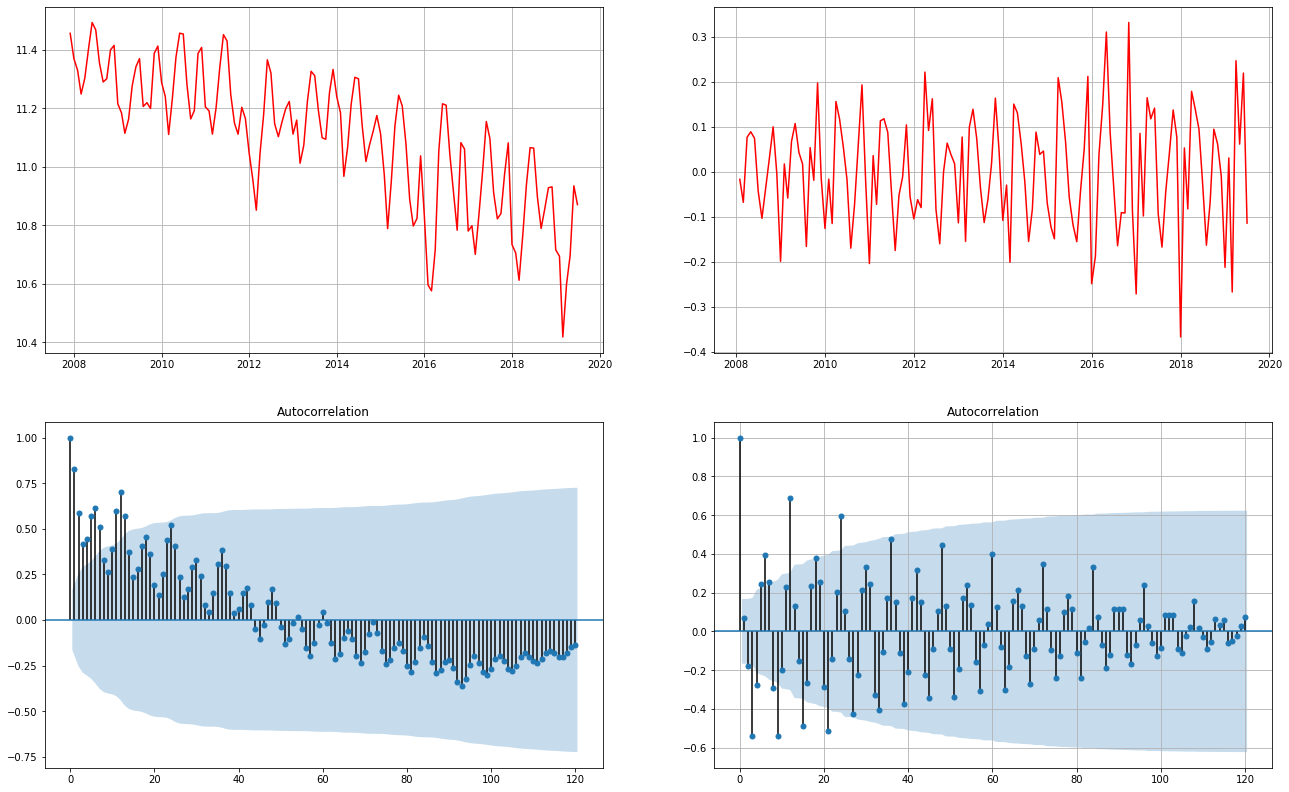

In [27]:
arma = arima_model.ARIMA(data['Consumption'], (1, 1, 0))
result = arma.fit()
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[1:], (data['Consumption'] - data['Consumption_1'] - result.predict()).iloc[1:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] - data['Consumption_1'] - result.predict()).iloc[2:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [28]:
adfuller((data['Consumption'] - data['Consumption_1'] - result.predict()).iloc[2:])[1]

2.0278913826460616e-05

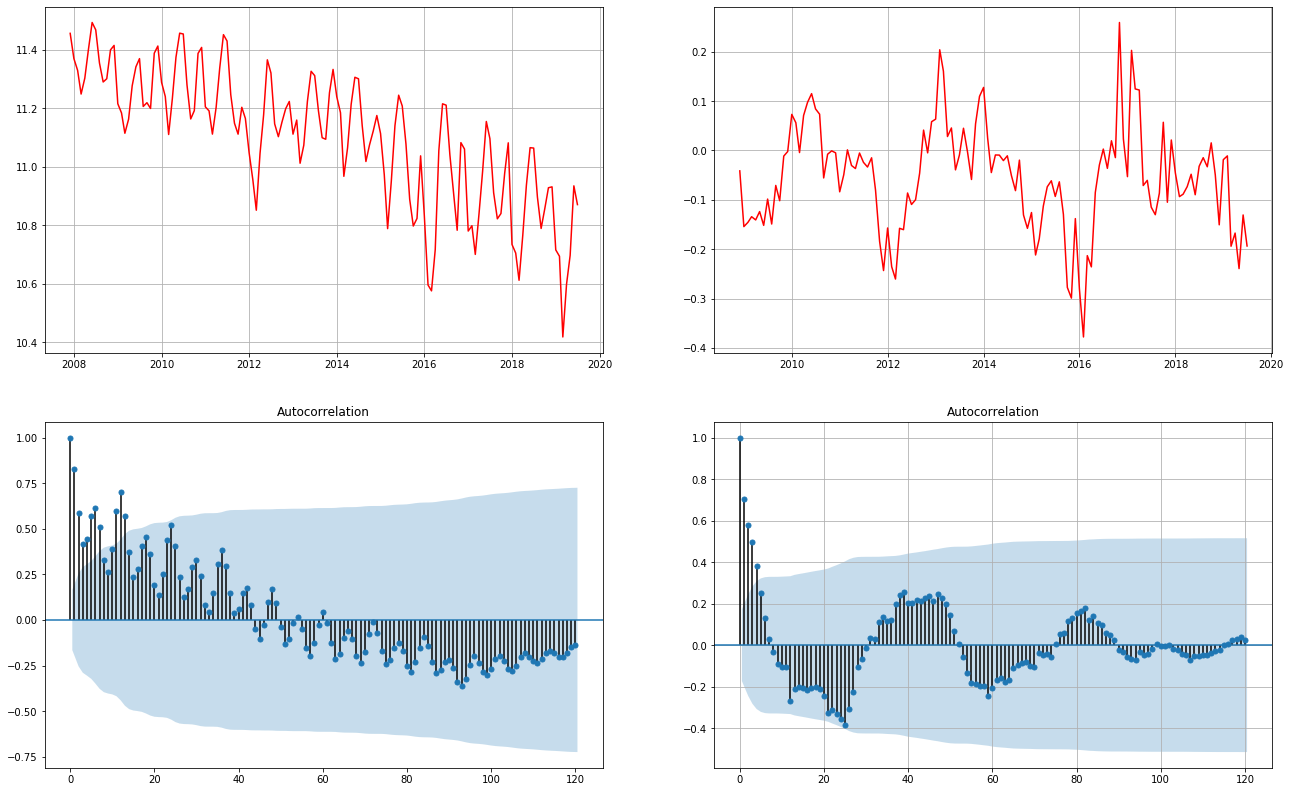

In [29]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[12:], (data['Consumption'] - data['Consumption'].shift(12)).iloc[12:], c='r');
axs[0, 1].grid(True);
plot_acf((data['Consumption'] - data['Consumption'].shift(12)).iloc[12:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [30]:
adfuller((data['Consumption'] - data['Consumption'].shift(12)).iloc[12:])[1]

0.04725131834040665

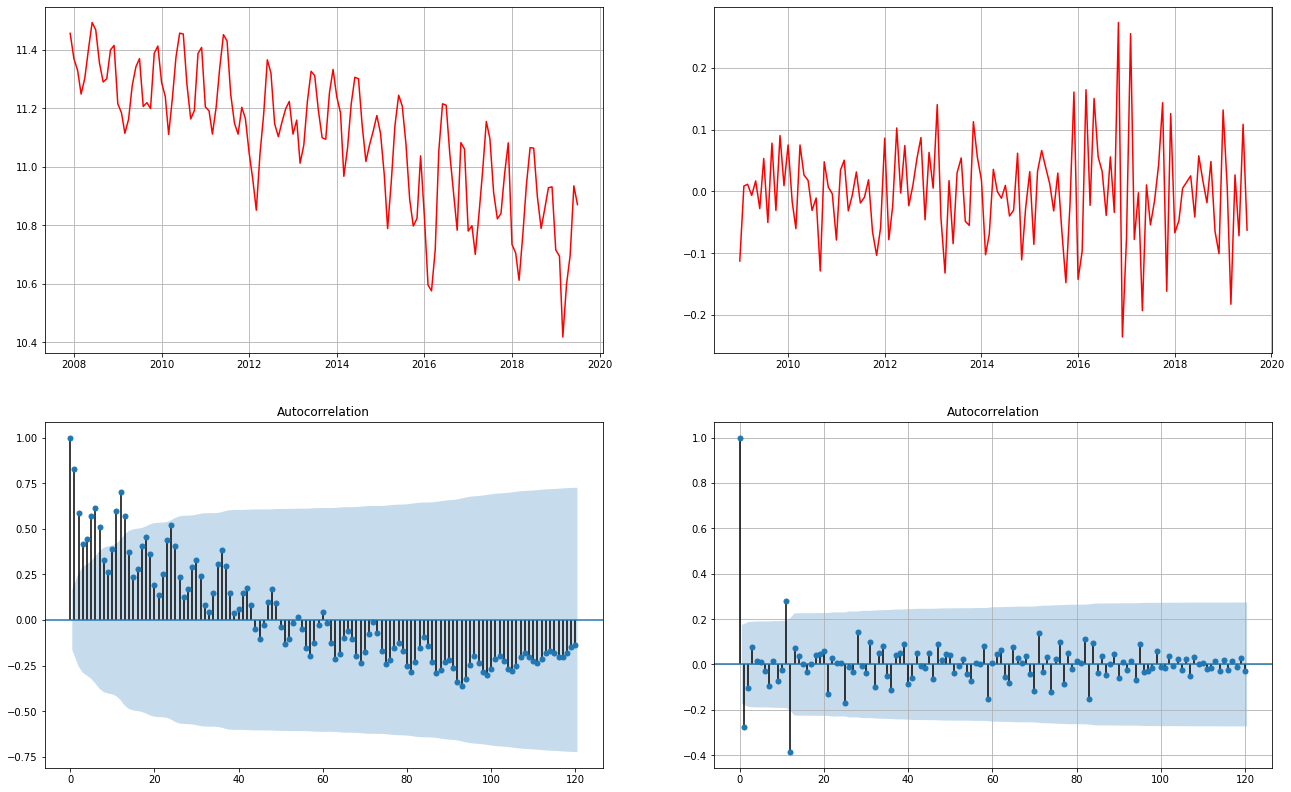

In [31]:
data['NoSeason'] = data['Consumption'] - data['Consumption'].shift(12)
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[13:], (data['NoSeason'] - data['NoSeason'].shift(1)).iloc[13:], c='r');3
axs[0, 1].grid(True);
plot_acf((data['NoSeason'] - data['NoSeason'].shift(1)).iloc[13:], ax=axs[1, 1], lags=120);
plt.grid(True);

In [32]:
adfuller((data['NoSeason'] - data['NoSeason'].shift(1)).iloc[13:])[1]

0.0015157961278196273

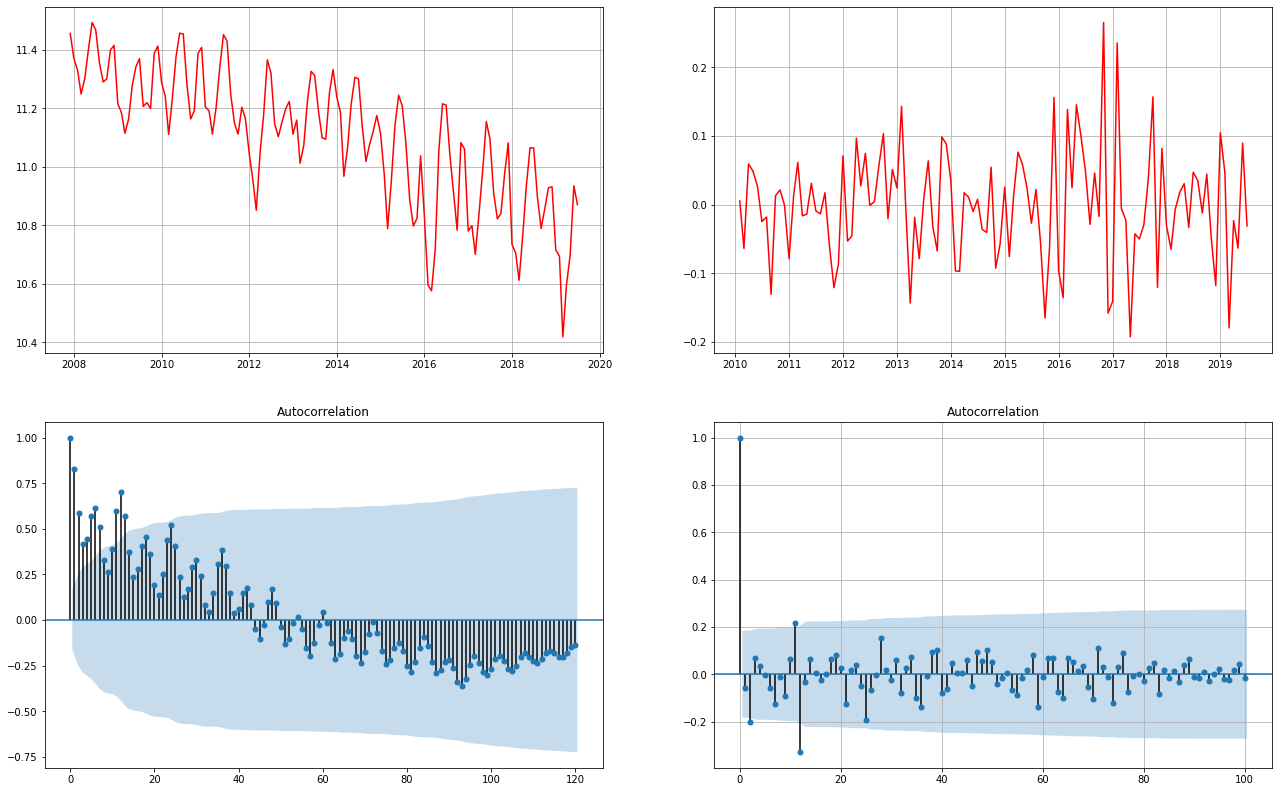

In [33]:
arma = arima_model.ARIMA(data['NoSeason'].iloc[12:], (1, 1, 0))
result = arma.fit()
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['Date'], data['Consumption'], c='r');
axs[0, 0].grid(True);
plot_acf(data['Consumption'].dropna(), ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['Date'].iloc[26:], (data['NoSeason'] - data['NoSeason'].shift(1) - result.predict()).iloc[26:], c='r');
axs[0, 1].grid(True);
plot_acf((data['NoSeason'] - data['NoSeason'].shift(1) - result.predict()).iloc[26:], ax=axs[1, 1], lags=100);
plt.grid(True);

In [34]:
adfuller((data['NoSeason'] - data['NoSeason'].shift(1) - result.predict()).iloc[26:])[1]

0.0025893879336947824

In [35]:
m = fbprophet.Prophet()

In [36]:
data.rename(columns={'Date': 'ds', 'Consumption': 'y'}, inplace=True)

In [37]:
m.fit(data[['ds', 'y']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods=3)
forecast = m.predict(future)

In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-01,11.399893,11.440210,11.583520,11.399893,11.399893,0.113948,0.113948,0.113948,0.113948,0.113948,0.113948,0.0,0.0,0.0,11.513840
1,2008-01-01,11.391867,11.308678,11.449513,11.391867,11.391867,-0.015907,-0.015907,-0.015907,-0.015907,-0.015907,-0.015907,0.0,0.0,0.0,11.375960
2,2008-02-01,11.383841,11.182365,11.325045,11.383841,11.383841,-0.127847,-0.127847,-0.127847,-0.127847,-0.127847,-0.127847,0.0,0.0,0.0,11.255994
3,2008-03-01,11.376334,11.074526,11.218841,11.376334,11.376334,-0.226684,-0.226684,-0.226684,-0.226684,-0.226684,-0.226684,0.0,0.0,0.0,11.149650
4,2008-04-01,11.368308,11.182103,11.328350,11.368308,11.368308,-0.107930,-0.107930,-0.107930,-0.107930,-0.107930,-0.107930,0.0,0.0,0.0,11.260378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2019-06-01,10.737951,10.855457,11.000752,10.737951,10.737951,0.192599,0.192599,0.192599,0.192599,0.192599,0.192599,0.0,0.0,0.0,10.930550
139,2019-07-01,10.730374,10.841861,10.985240,10.730374,10.730374,0.179434,0.179434,0.179434,0.179434,0.179434,0.179434,0.0,0.0,0.0,10.909807
140,2019-07-02,10.730121,10.842365,10.987963,10.730121,10.730121,0.184538,0.184538,0.184538,0.184538,0.184538,0.184538,0.0,0.0,0.0,10.914659
141,2019-07-03,10.729869,10.852956,10.988370,10.729869,10.729869,0.192101,0.192101,0.192101,0.192101,0.192101,0.192101,0.0,0.0,0.0,10.921969


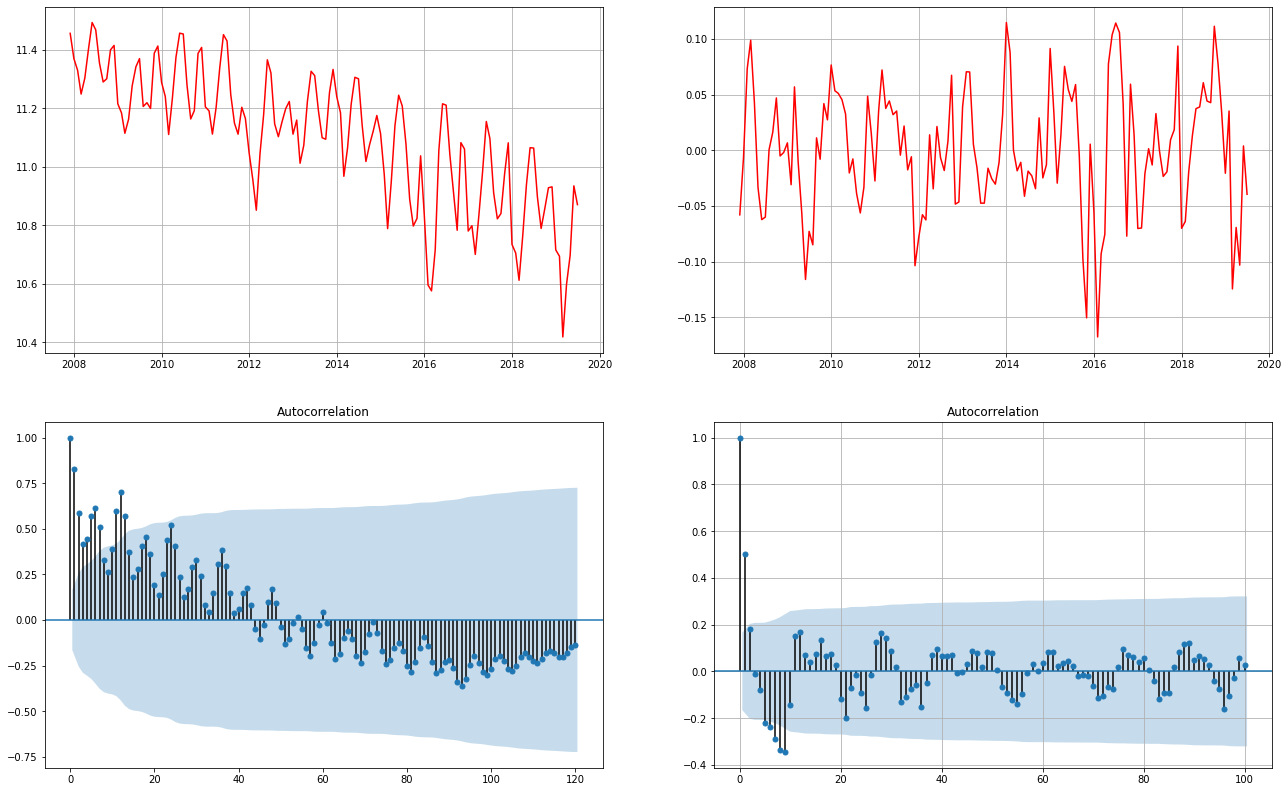

In [41]:
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(22);
fig.set_figheight(14);
axs[0, 0].plot(data['ds'], data['y'], c='r');
axs[0, 0].grid(True);
plot_acf(data['y'], ax=axs[1, 0], lags=120);
plt.grid(True);
axs[0, 1].plot(data['ds'], (data['y'] - forecast['yhat']).iloc[:-3], c='r');
axs[0, 1].grid(True);
plot_acf((data['y'] - forecast['yhat']).iloc[:-3], ax=axs[1, 1], lags=100);
plt.grid(True);

In [42]:
adfuller((data['y'] - forecast['yhat']).iloc[:-3])[1]

0.00015885249478266397